In [575]:
using Plots
using LinearAlgebra

In [576]:
function finite_difference(h::Float64, sigma::Float64, beta::Float64, f::Function)
    
    m = Int(ceil(1/h))

    d_up = ones(m+1)
    d_up[1] = h

    d = -2*ones(m+2)
    d[1] = -h
    d[m+2] = h^2

    d_down = ones(m+1)
    d_down[m+1] = 0

    A = Tridiagonal(d_down,d,d_up)
    A = (1/h^2)*A
    
    x = LinRange(0,1,m+2)
    
    G = zeros(m+2)
    G[1:m+2] = f.(x)
    G[1] = sigma + (h/2)*f(x[1])
    G[m+2] = beta
    
    return A\G, x
end

finite_difference (generic function with 1 method)

In [577]:
u(x) = exp(x) - x + 4 - ℯ

u (generic function with 1 method)

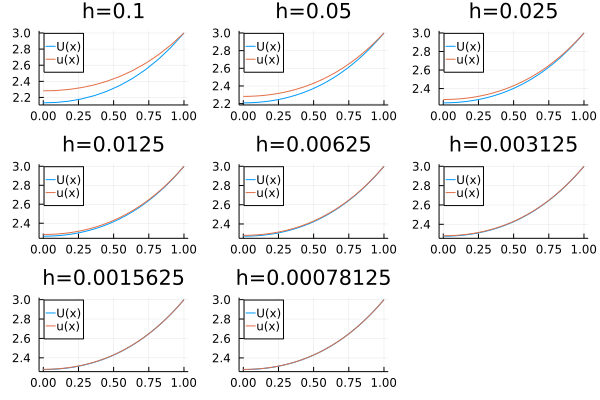

In [578]:
size(10,20)

U1, x1 = finite_difference(0.1, 0., 3., exp)
p1 = plot(x1,U1, title = "h=0.1", label = "U(x)",legend=:topleft)
u1 = u.(x1)
plot!(p1,x1,u1,label = "u(x)")
 
U2, x2 = finite_difference(0.05, 0., 3., exp)
p2 = plot(x2,U2, title = "h=0.05", label = "U(x)",legend=:topleft)
u2 = u.(x2)
plot!(p2,x2,u2, label = "u(x)")

U3, x3 = finite_difference(0.025, 0., 3., exp)
p3 = plot(x3,U3, title = "h=0.025", label = "U(x)",legend=:topleft)
u3 = u.(x3)
plot!(p3,x3,u3, label = "u(x)")

U4, x4 = finite_difference(0.0125, 0., 3., exp)
p4 = plot(x4,U4, title = "h=0.0125", label = "U(x)",legend=:topleft)
u4 = u.(x4)
plot!(p4,x4,u4, label = "u(x)")

U5, x5 = finite_difference(0.00625, 0., 3., exp)
p5 = plot(x5,U5, title = "h=0.00625", label = "U(x)",legend=:topleft)
u5 = u.(x5)
plot!(p5,x5,u5, label = "u(x)")

U6, x6 = finite_difference(0.003125, 0., 3., exp)
p6 = plot(x6,U6, title = "h=0.003125", label = "U(x)",legend=:topleft)
u6 = u.(x6)
plot!(p6,x6,u6, label = "u(x)")

U7, x7 = finite_difference(0.0015625, 0., 3., exp)
p7 = plot(x7,U7, title = "h=0.0015625", label = "U(x)",legend=:topleft)
u7 = u.(x7)
plot!(p7,x7,u7, label = "u(x)")

U8, x8 = finite_difference(0.00078125, 0., 3., exp)
p8 = plot(x8,U8, title = "h=0.00078125", label = "U(x)",legend=:topleft)
u8 = u.(x8)
plot!(p8,x8,u8, label = "u(x)")

plot(p1,p2,p3,p4,p5,p6,p7,p8)

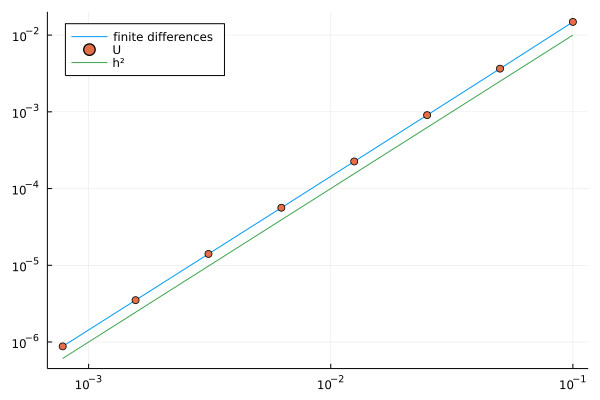

In [581]:
h = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625, 0.00078125]
U = [U1, U2, U3, U4, U5, U6, U7, U8]
u_real = [u1, u2, u3, u4, u5, u6, u7, u8]
n = U .- u_real
err = h.*(norm.(n,Inf))

plot(h,err,xaxis=:log, yaxis=:log, legend=:topleft, label="finite differences")
scatter!(h,err,label="U")
plot!(h,h.^2,label="h²")
#png("findiff")

In [605]:
function deferred_finite_difference(h::Float64, sigma::Float64, beta::Float64, f::Function)
    
    m = Int(ceil(1/h))

    d_up = ones(m+1)
    d_up[1] = h

    d = -2*ones(m+2)
    d[1] = -h
    d[m+2] = h^2

    d_down = ones(m+1)
    d_down[m+1] = 0

    A = Tridiagonal(d_down,d,d_up)
    A = (1/h^2)*A
    
    x = LinRange(0,1,m+2)
    
    G = zeros(m+2)
    G = f.(x) + (h^2/12)*f.(x)
    G[1] = sigma + (h/2)*f(x[1]) + (h^2/6)*f(x[1]) + (h^3/24)*f(x[1])
    G[m+2] = beta
    
    return A\G, x
end

deferred_finite_difference (generic function with 4 methods)

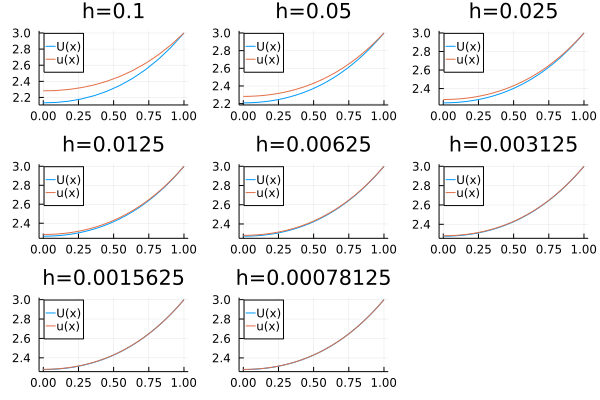

In [606]:
size(10,20)

U1d, x1 = deferred_finite_difference(0.1, 0., 3., exp)
p1 = plot(x1,U1, title = "h=0.1", label = "U(x)",legend=:topleft)
plot!(p1,x1,u1,label = "u(x)")
 
U2d, x2 = deferred_finite_difference(0.05, 0., 3., exp)
p2 = plot(x2,U2, title = "h=0.05", label = "U(x)",legend=:topleft)
plot!(p2,x2,u2, label = "u(x)")

U3d, x3 = deferred_finite_difference(0.025, 0., 3., exp)
p3 = plot(x3,U3, title = "h=0.025", label = "U(x)",legend=:topleft)
plot!(p3,x3,u3, label = "u(x)")

U4d, x4 = deferred_finite_difference(0.0125, 0., 3., exp)
p4 = plot(x4,U4, title = "h=0.0125", label = "U(x)",legend=:topleft)
plot!(p4,x4,u4, label = "u(x)")

U5d, x5 = deferred_finite_difference(0.00625, 0., 3., exp)
p5 = plot(x5,U5, title = "h=0.00625", label = "U(x)",legend=:topleft)
plot!(p5,x5,u5, label = "u(x)")

U6d, x6 = deferred_finite_difference(0.003125, 0., 3., exp)
p6 = plot(x6,U6, title = "h=0.003125", label = "U(x)",legend=:topleft)
plot!(p6,x6,u6, label = "u(x)")

U7d, x7 = deferred_finite_difference(0.0015625, 0., 3., exp)
p7 = plot(x7,U7, title = "h=0.0015625", label = "U(x)",legend=:topleft)
plot!(p7,x7,u7, label = "u(x)")

U8d, x8 = deferred_finite_difference(0.00078125, 0., 3., exp)
p8 = plot(x8,U8, title = "h=0.00078125", label = "U(x)",legend=:topleft)
plot!(p8,x8,u8, label = "u(x)")

plot(p1,p2,p3,p4,p5,p6,p7,p8)

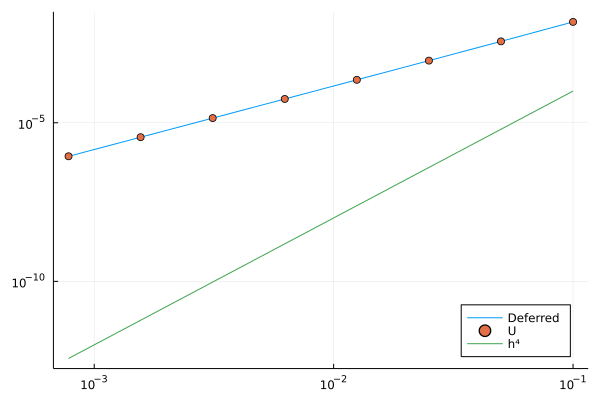

In [609]:
Ud = [U1d, U2d, U3d, U4d, U5d, U6d, U7d, U8d]
nd = Ud .- u_real
errd = h.*(norm.(nd,Inf))

plot(h,errd,xaxis=:log, yaxis=:log, legend=:bottomright,label="Deferred")
scatter!(h,errd,label="U")
plot!(h,h.^4,label="h⁴")

In [583]:
function deferred_finite_difference2(h::Float64, sigma::Float64, beta::Float64, f::Function, f1::Function, f2::Function)
    
    m = Int(ceil(1/h))

    d_up = ones(m+1)
    d_up[1] = h

    d = -2*ones(m+2)
    d[1] = -h
    d[m+2] = h^2

    d_down = ones(m+1)
    d_down[m+1] = 0

    A = Tridiagonal(d_down,d,d_up)
    A = (1/h^2)*A
    
    x = LinRange(0,1,m+2)
    
    G = zeros(m+2)
    G[1] = (h/2)*f(x[1]) + (h^2/6)*f(x[1]) + (h^3/24)*f(x[1])
    G[m+2] = beta
    f_list = f.(x)
    f2 = zeros(m)
    for i=2:m+1
        f2[i-1] = (f_list[i-1] - 2*f_list[i] + f_list[i+1])/h^2
    end
    G[2:m+1] = f.(x[2:m+1]) + (h^2/12)*f2
    
    return A\G, x
end

deferred_finite_difference2 (generic function with 1 method)

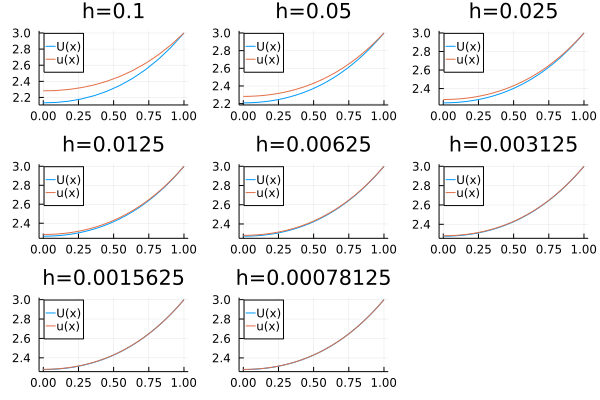

In [584]:
size(10,20)

U1d2, x1 = deferred_finite_difference2(0.1, 0., 3., exp, exp, exp)
p1 = plot(x1,U1, title = "h=0.1", label = "U(x)",legend=:topleft)
plot!(p1,x1,u1,label = "u(x)")
 
U2d2, x2 = deferred_finite_difference2(0.05, 0., 3., exp, exp, exp)
p2 = plot(x2,U2, title = "h=0.05", label = "U(x)",legend=:topleft)
plot!(p2,x2,u2, label = "u(x)")

U3d2, x3 = deferred_finite_difference2(0.025, 0., 3., exp, exp, exp)
p3 = plot(x3,U3, title = "h=0.025", label = "U(x)",legend=:topleft)
plot!(p3,x3,u3, label = "u(x)")

U4d2, x4 = deferred_finite_difference2(0.0125, 0., 3., exp, exp, exp)
p4 = plot(x4,U4, title = "h=0.0125", label = "U(x)",legend=:topleft)
plot!(p4,x4,u4, label = "u(x)")

U5d2, x5 = deferred_finite_difference2(0.00625, 0., 3., exp, exp, exp)
p5 = plot(x5,U5, title = "h=0.00625", label = "U(x)",legend=:topleft)
plot!(p5,x5,u5, label = "u(x)")

U6d2, x6 = deferred_finite_difference2(0.003125, 0., 3., exp, exp, exp)
p6 = plot(x6,U6, title = "h=0.003125", label = "U(x)",legend=:topleft)
plot!(p6,x6,u6, label = "u(x)")

U7d2, x7 = deferred_finite_difference2(0.0015625, 0., 3., exp, exp, exp)
p7 = plot(x7,U7, title = "h=0.0015625", label = "U(x)",legend=:topleft)
plot!(p7,x7,u7, label = "u(x)")

U8d2, x8 = deferred_finite_difference2(0.00078125, 0., 3., exp, exp, exp)
p8 = plot(x8,U8, title = "h=0.00078125", label = "U(x)",legend=:topleft)
plot!(p8,x8,u8, label = "u(x)")

plot(p1,p2,p3,p4,p5,p6,p7,p8)

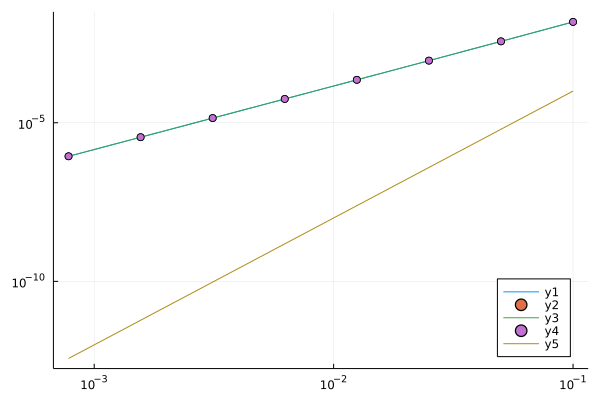

In [611]:
Ud2 = [U1d2, U2d2, U3d2, U4d2, U5d2, U6d2, U7d2, U8d2]
nd2 = Ud2 .- u_real
errd2 = h.*(norm.(nd2,Inf))

plot(h,errd2,xaxis=:log, yaxis=:log, legend=:bottomright)
scatter!(h,errd2,legend)
plot!(h,errd,xaxis=:log, yaxis=:log)
scatter!(h,errd)
plot!(h,h.^4)